# Homework 1
## Linear Regression with Gradient Descent

In this homework, we will use a dataset provided:
"D3.csv" Let the first three columns of the data set be separate explanatory variables ×1, ×2, ×3. Let the fourth column be the dependent variable Y. (Note:
You cannot use the built-in function from ML libraries for gradient descent; you have to implement it yourself.)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read dataset
csv_file = '/content/drive/My Drive/D3.csv'
df = pd.read_csv(csv_file)

# Print dataset summary
print(df)

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


In [3]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta) # multiply element by element then sum up
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    m = len(y)  # Number of training examples
    J = 1 / (2 * m) * np.sum(sqrErrors) # loss function
    return J



def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    # for loop to iterate for theta values to minimize loss (cost)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [4]:
def plot_model(X, y, theta, x_label, y_label, title ):
    # Assuming that X, y, and theta are already defined
    # Also assuming that X has two columns: a feature column and a column of ones

    # New figure
    plt.figure()

    # Scatter plot for the training data
    plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

    # Line plot for the linear regression model
    plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

    # Plot customizations
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Show the plot
    plt.show()



def plot_loss(cost_history, title):
    iterations = len(cost_history)
    plt.figure() # New figure
    plt.plot(range(1, iterations + 1), cost_history, color='blue')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid(True)

    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(title)

    # Show the plot
    plt.show()


## Problem 1 (40 points)
Develop a code that run linear regression with a gradient descent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).
1. Report the linear model you found for each explanatory variable.
Y = theta0 + theta1.dot(X)


2. Plot the final regression model and loss over the iteration per each explanatory variable.


3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?

X1 has the lowest loss (cost) for both learning rates of 0.01 and 0.1 which are approximately 0.99 and 0.98.


4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
The higher the learning rate, the less iterations the training model takes to get to the final loss which is approximately the same, regardless of the learning value.

Training for X1
Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


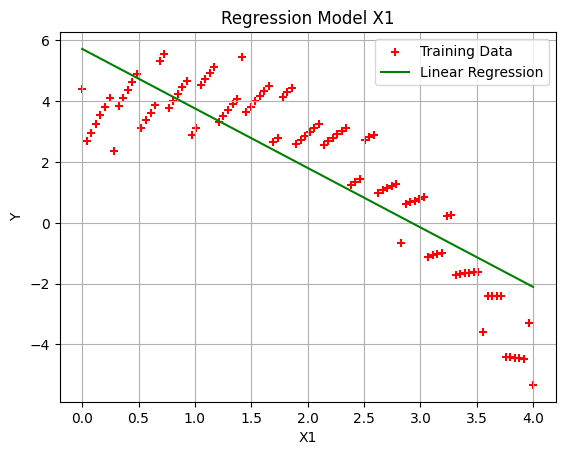

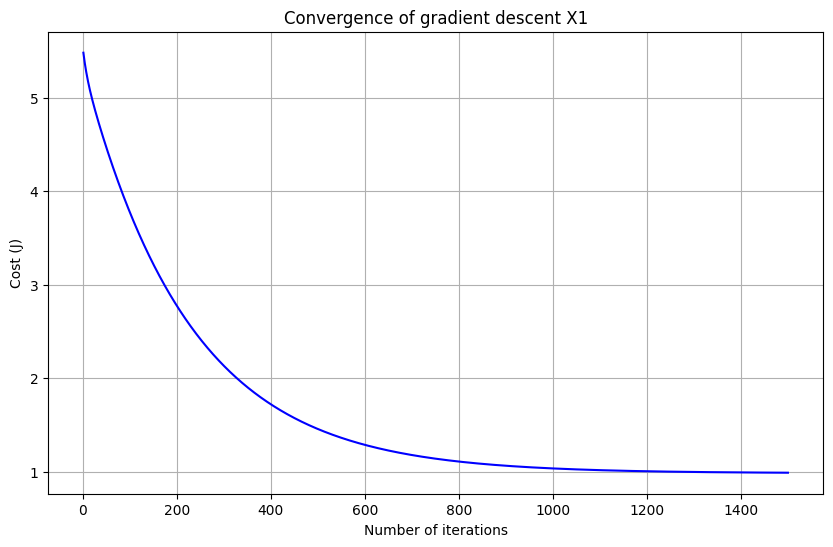

Training for X2
Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


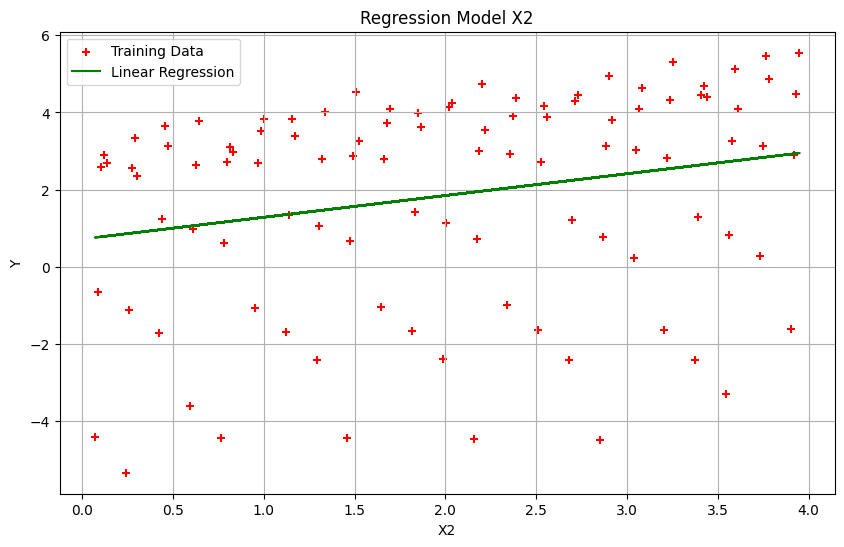

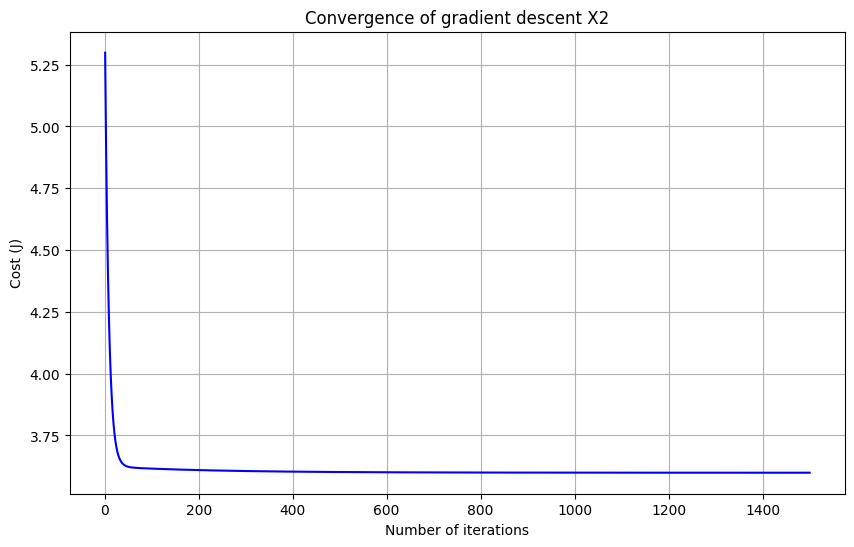

Training for X3
Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


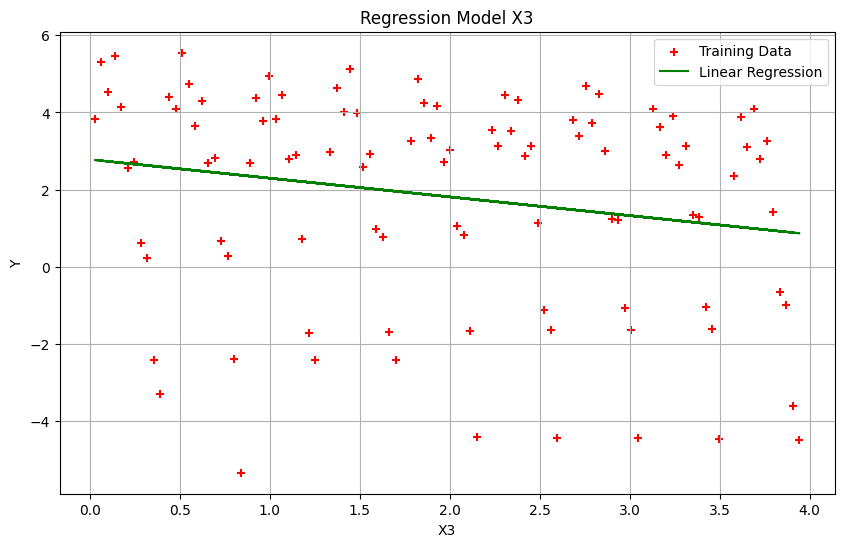

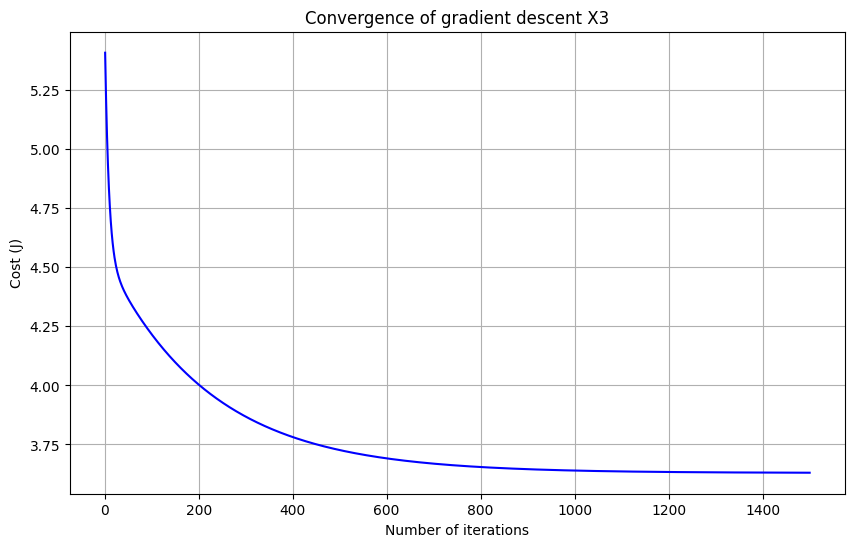

In [5]:
vars = ['X1', 'X2', 'X3'] # list of X strings
alpha_dict = {'X1':0.01, 'X2':0.01, 'X3':0.01} # {'X1':0.1, 'X2':0.1, 'X3':0.1}

for var in vars:
    X = df[var].to_numpy()
    y = df['Y'].to_numpy()
    m = len(y)  # Number of training examples

    X_0 = np.ones((m, 1))
    X_1 = X.reshape(m, 1)
    X = np.hstack((X_0, X_1))

    theta = [0., 0.]
    iterations = 1500
    alpha = alpha_dict[var]

    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
    print('Training for ' + var)
    print('Final value of theta =', theta)
    print('cost_history =', cost_history)
    plot_model(X, y, theta, var, 'Y', 'Regression Model ' + var)
    plot_loss(cost_history, 'Convergence of gradient descent ' + var)

## Problem 2 (60 points)
This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).
1. Report the final linear model you found the best.
Y = theta0 + theta1.dot(X1) + theta2.dot(X2) + theta3.dot(X3)


2. Plot loss over the iteration.


3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.


4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

Training for X1,X2,X3 combined
Final value of theta = [ 5.25606097 -1.99551081  0.54216503 -0.25708468]
cost_history = [4.71048139 4.32282567 4.08518061 ... 0.73864626 0.73864517 0.73864409]


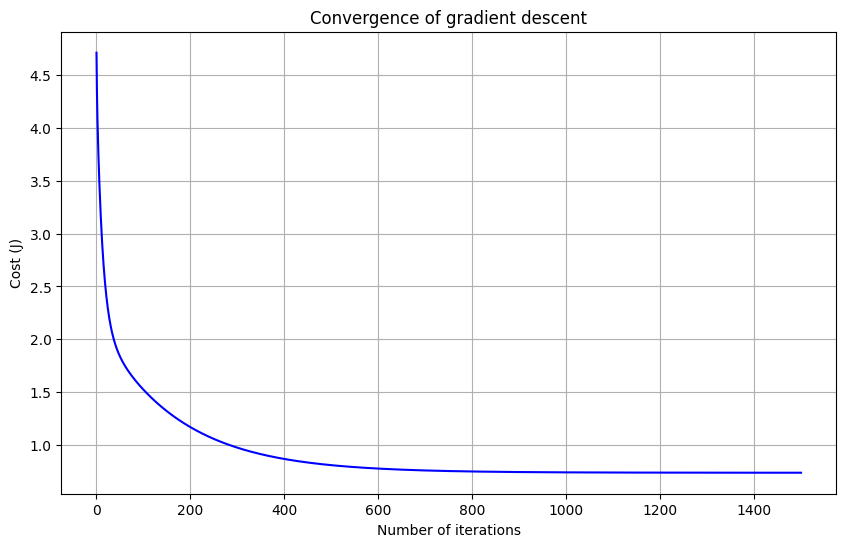

In [6]:
X = df[['X1', 'X2', 'X3']].to_numpy() # converting X dataframe to numpy array
y = df['Y'].to_numpy()  # Y conversion into a numpy array
m = len(y)  # Number of training examples

X_0 = np.ones((m, 1))
X = np.hstack((X_0, X)) # adding X0 to X1,X2 and X3

theta = [0., 0., 0., 0.,] # theta initialization to zero
iterations = 1500
alpha = 0.03 # learning rate value

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Training for X1,X2,X3 combined' )
print('Final value of theta =', theta)
print('cost_history =', cost_history)
plot_loss(cost_history, 'Convergence of gradient descent')

In [7]:
# 4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
X_dataset = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]]) # X array
num_sets, _ = X_dataset.shape # to return the number of rows in X

for set in range(num_sets):
    X = X_dataset[set, :] # acquiring set values one at a time
    X = np.hstack((1, X)) # adding X0 to X array [X0 X1 X2 X3]
    y = X.dot(theta) # computing linear model Y with X1, X2 and X3
    print('X = ' + str(X_dataset[set, :]) + ' -> ' + 'y = ' + str(y))

X = [1 1 1] -> y = 3.545630515470255
X = [2 0 4] -> y = 0.23670064969674898
X = [3 2 1] -> y = 0.09677392769914245
